<a href="https://colab.research.google.com/github/yonathanarbel/AI-LAW/blob/main/Class5_Homework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Homework, due Monday, September 30th

In [1]:
# Install necessary libraries
import requests
import io
import zipfile
import pandas as pd
import random
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
# Import libraries for text preprocessing
import re  # For regular expressions
import nltk  # For text processing
nltk.download('stopwords')  # Download the list of stopwords
nltk.download('wordnet')    # Download WordNet data for lemmatization

from nltk.corpus import stopwords  # For stopwords
from nltk.stem import WordNetLemmatizer  # For lemmatization

# Import libraries for data manipulation and visualization
import pandas as pd  # For handling dataframes
import numpy as np   # For numerical operations
import matplotlib.pyplot as plt  # For plotting graphs
import seaborn as sns  # For advanced data visualization

# Import libraries for machine learning models and evaluation
from sklearn.model_selection import train_test_split  # For splitting data into training and testing sets
from sklearn.feature_extraction.text import TfidfVectorizer  # For converting text data into TF-IDF features
from sklearn.tree import DecisionTreeClassifier  # For Decision Tree model
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score  # For model evaluation

# Import libraries for building the Neural Network
from tensorflow.keras.models import Sequential  # For creating sequential models
from tensorflow.keras.layers import Dense  # For adding layers to the neural network
from tensorflow.keras.utils import to_categorical  # For converting labels to categorical format

# Suppress warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
#we start today with a quest: we have a large number of news articles, but only the ones related to politics are relevant to our defamation case
#we are going to get a large number of news articles from our client and we would need to classify them
#sure, we could read all the articles and sort them, but we are too lazy for that. Or, more politely, we find that our cclient would appreciate our billable time be spent elsewhere.

#instead, today we will train two types of models and try to evaluate which one is better
#one model will be a decision tree and the other will be based on a neural network

#our learning goals are
'''
1. understand how to preprocess models
2. figure out how to do EDA
2. understand how to evaluate models
3. understand how to read a confusion matrix
4. learn the distinction between training loss and validation loss
5. understand overfitting and how to prevent it
'''




'\n1. understand how to preprocess models\n2. figure out how to do EDA\n2. understand how to evaluate models\n3. understand how to read a confusion matrix\n4. learn the distinction between training loss and validation loss\n5. understand overfitting and how to prevent it\n'

In [3]:

#Fortunatley, we have a dataset we can start our work from

# Download the zip file
url = "http://battleoftheforms.com/wp-content/uploads/2024/09/news-article-categories.csv.zip"
response = requests.get(url)
zip_file = zipfile.ZipFile(io.BytesIO(response.content))

# Extract the CSV file
csv_file = zip_file.extract("news-article-categories.csv")

# Read the CSV file
df = pd.read_csv(csv_file)




In [4]:
#Check out the data! Only fools blindly run code without looking at the data first and thinking about it (the technical term for looking at your data before modeling with it is "exploratory data analysis").

#first stage of an EDA is to figure out the fields in our data and what do they say

#let's see which keys we have
print(df.keys())



Index(['category', 'title', 'body'], dtype='object')


In [5]:
#if you think of our data as an excel sheet, the keys above tell you which columns we have in our dataset

In [6]:
#let's get a feel for our data

# Select a random article
random_article = df.sample(n=1).iloc[0]
# Display the random article
print("Random Article:")
print(f"Title: {random_article['title']}")
print(f"Content: {random_article['body']}")
print(f"Category: {random_article['category']}")

Random Article:
Title: The Mayhem Of 'Murphy'
Content: Most of us have heard of "Murphy's Law" by now.  It goes; "Anything that can go wrong, will go wrong."  It most circumstances the outcome of "Murphy's Law" is little more than a minor inconvenience.  The package delivered to the wrong address in spite of repeated instructions, bad weather when you have just lost your cover set, you can think of a hundred other situations.  In film production, holding Murphy at bay is a full time concern. But on big city streets, at night, doing major stunt work, Murphy may have a much darker side. Early in my career I had the privilege of working with the legendary writer, photographer, director, Gordon parks, on a film called Super Cops.  It was shot on location in the Bedford-Stuyvesant neighborhood of Brooklyn.  It told the story of two undercover narcotics detectives named Greenberg and Hantz, two adrenalin-fueled warriors known on the streets as "Batman and Robin." Although I began the job as 

In [7]:
# Check for missing values in each column
df.isnull().sum()

,0
category,0
title,0
body,5


'''Now it's your turn to do more extensive EDA. Please use ChatGPT or your favorite artificial intelligence, and produce code that will:

Create a bar plot showing the distribution of articles across different categories.
Generate a histogram displaying the distribution of article lengths (in characters).
Produce a bar plot comparing the average article length for each category.
Create a word cloud visualization of the most common words in article titles.
Calculate and display basic summary statistics for article lengths (mean, median, min, max, etc.).
Generate a box plot showing the distribution of article lengths for each category.
Create a bar plot of the top 10 most frequently occurring words in article titles.

In addition to these visualizations, your code should also output the following information:

The total number of articles in the dataset
The number of unique categories
A list of the top 5 categories by number of articles
Details of the articles with the longest titles'''

Hint, if you run into trouble, feed all the cells to chatGPT, so it will know what are the names of our local variables

In [8]:
#the point of training is to take training examples that are labelled and have the model learn from those examples
# Look at the data, what is a label?
#what data exists other than the label?
# Get the unique categories
categories = df['category'].unique()
print('Categories:', categories)

# Create a mapping of categories to numerical values
category_mapping = {category: idx for idx, category in enumerate(categories)}
print('Category Mapping:', category_mapping)

# Apply the mapping to create a new column with encoded categories
df['category_encoded'] = df['category'].map(category_mapping)

# Display the encoded categories
df[['category', 'category_encoded']].head()


Categories: ['ARTS & CULTURE' 'BUSINESS' 'COMEDY' 'CRIME' 'EDUCATION' 'ENTERTAINMENT'
 'ENVIRONMENT' 'MEDIA' 'POLITICS' 'RELIGION' 'SCIENCE' 'SPORTS' 'TECH'
 'WOMEN']
Category Mapping: {'ARTS & CULTURE': 0, 'BUSINESS': 1, 'COMEDY': 2, 'CRIME': 3, 'EDUCATION': 4, 'ENTERTAINMENT': 5, 'ENVIRONMENT': 6, 'MEDIA': 7, 'POLITICS': 8, 'RELIGION': 9, 'SCIENCE': 10, 'SPORTS': 11, 'TECH': 12, 'WOMEN': 13}


,category,category_encoded
0,ARTS & CULTURE,0
1,ARTS & CULTURE,0
2,ARTS & CULTURE,0
3,ARTS & CULTURE,0
4,ARTS & CULTURE,0


Now we want to do some preprocessing to all the text, in the spirit of the edits we talked about in the past.

Take a look at the code below; used chat gpt as needed. Using your own words please answer: What techniques for text preprocessing are we using?


In [9]:

lemmatizer = WordNetLemmatizer()

# Define a function to clean and preprocess text
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    words = text.split()
    words = [lemmatizer.lemmatize(word) for word in words if word not in stopwords.words('english')]
    clean_text = ' '.join(words)
    return clean_text


# Apply the preprocessing function to the 'title' column
df['clean_text'] = df['title'].apply(preprocess_text)

# Display the original and cleaned text
df[['title', 'clean_text']].head()

,title,clean_text
0,Modeling Agencies Enabled Sexual Predators For...,modeling agency enabled sexual predator year f...
1,Actor Jeff Hiller Talks “Bright Colors And Bol...,actor jeff hiller talk bright color bold patte...
2,New Yorker Cover Puts Trump 'In The Hole' Afte...,new yorker cover put trump hole racist comment
3,Man Surprises Girlfriend By Drawing Them In Di...,man surprise girlfriend drawing different anim...
4,This Artist Gives Renaissance-Style Sculptures...,artist give renaissancestyle sculpture goofy m...


Your answer here:





The next step now is to turn the words into numbers. We could use embeddings, but today we will use the TF IDF method instead.

[link text](https://)

Available categories and their counts:
category
ARTS & CULTURE    1002
BUSINESS           501
ENTERTAINMENT      501
ENVIRONMENT        501
POLITICS           501
RELIGION           501
SPORTS             501
TECH               501
WOMEN              501
EDUCATION          490
COMEDY             380
SCIENCE            350
MEDIA              347
CRIME              300
Name: count, dtype: int64


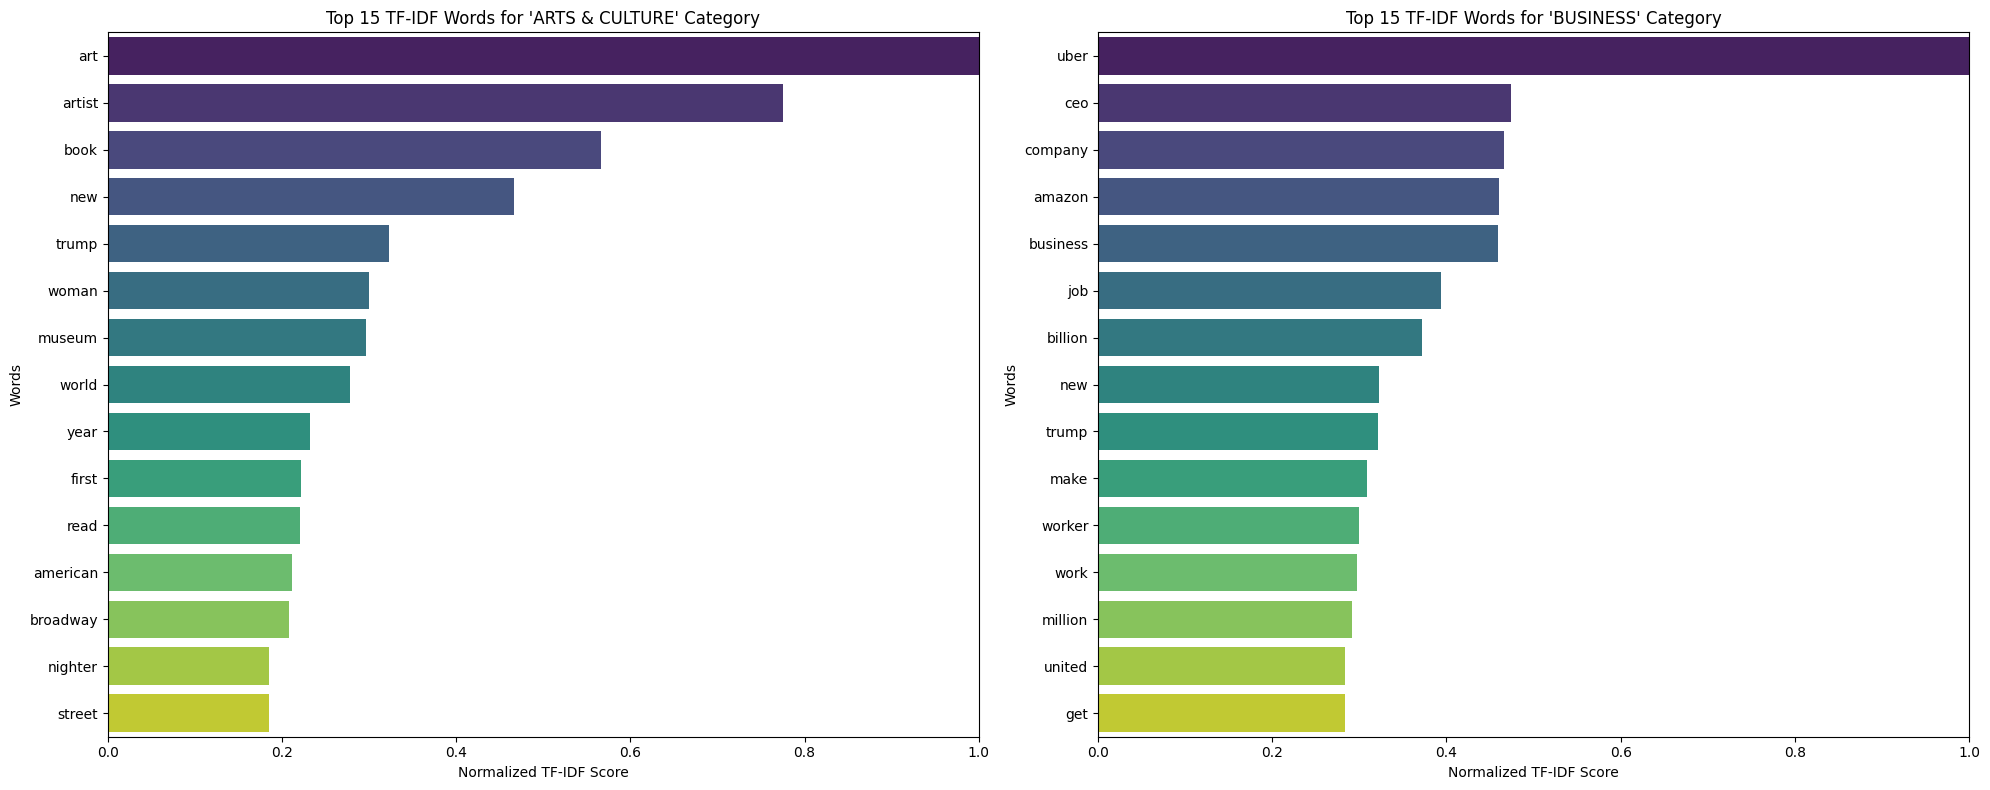

In [10]:

# Assuming df, clean_text, and category_mapping are already defined from previous code

# Print available categories and their counts
print("Available categories and their counts:")
category_counts = df['category'].value_counts()
print(category_counts)

# Select two categories with significant number of articles
categories_to_visualize = category_counts.nlargest(2).index.tolist()

# Create TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)

# Fit and transform the cleaned text data
tfidf_matrix = tfidf_vectorizer.fit_transform(df['clean_text'])

# Get feature names (words)
feature_names = tfidf_vectorizer.get_feature_names_out()

# Convert TF-IDF matrix to DataFrame for easier analysis
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=feature_names)

# Function to get top N TF-IDF scores for each category
def get_top_tfidf_scores(category, n=15):
    category_mask = df['category'] == category
    category_tfidf = tfidf_df[category_mask]

    # Calculate mean TF-IDF score for each word in the category
    mean_tfidf = category_tfidf.mean()

    # Sort and get top N words
    top_words = mean_tfidf.sort_values(ascending=False).head(n)
    return top_words

# Get top words for both categories
top_words1 = get_top_tfidf_scores(categories_to_visualize[0])
top_words2 = get_top_tfidf_scores(categories_to_visualize[1])

# Function to safely normalize and handle potential issues
def safe_normalize(series):
    max_value = series.max()
    if pd.isna(max_value) or max_value == 0:
        print(f"Warning: Unable to normalize {series.name}. All values are NaN or zero.")
        return series
    return series / max_value

# Normalize scores for better visualization
top_words1_norm = safe_normalize(top_words1)
top_words2_norm = safe_normalize(top_words2)

# Create a side-by-side visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# Plot for category1
sns.barplot(x=top_words1_norm.values, y=top_words1_norm.index, ax=ax1, palette='viridis')
ax1.set_title(f"Top 15 TF-IDF Words for '{categories_to_visualize[0]}' Category")
ax1.set_xlabel("Normalized TF-IDF Score")
ax1.set_ylabel("Words")
ax1.set_xlim(0, 1)  # Set x-axis limit

# Plot for category2
sns.barplot(x=top_words2_norm.values, y=top_words2_norm.index, ax=ax2, palette='viridis')
ax2.set_title(f"Top 15 TF-IDF Words for '{categories_to_visualize[1]}' Category")
ax2.set_xlabel("Normalized TF-IDF Score")
ax2.set_ylabel("Words")
ax2.set_xlim(0, 1)  # Set x-axis limit

plt.tight_layout()
plt.show()

What do we learn from the TFIDF?

In [11]:
#OK, let's see how we train a model to detect the differences
#The first step is critical
#We split the data to training and validation sets

X_train, X_val, y_train, y_val = train_test_split(
    tfidf_matrix, df['category'], test_size=0.2, random_state=42, stratify=df['category']
)
#we call, as is conventional, the training data X and the labels are called y.

#we do an 80-20 split, with twenty percent of the data used for VALIDATION.

#Remember this fact for what comes next.

In [12]:
#Now we will train a decision tree

In [13]:
# Initialize the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Train the classifier on the training data
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

Let's visualize the decision tree!

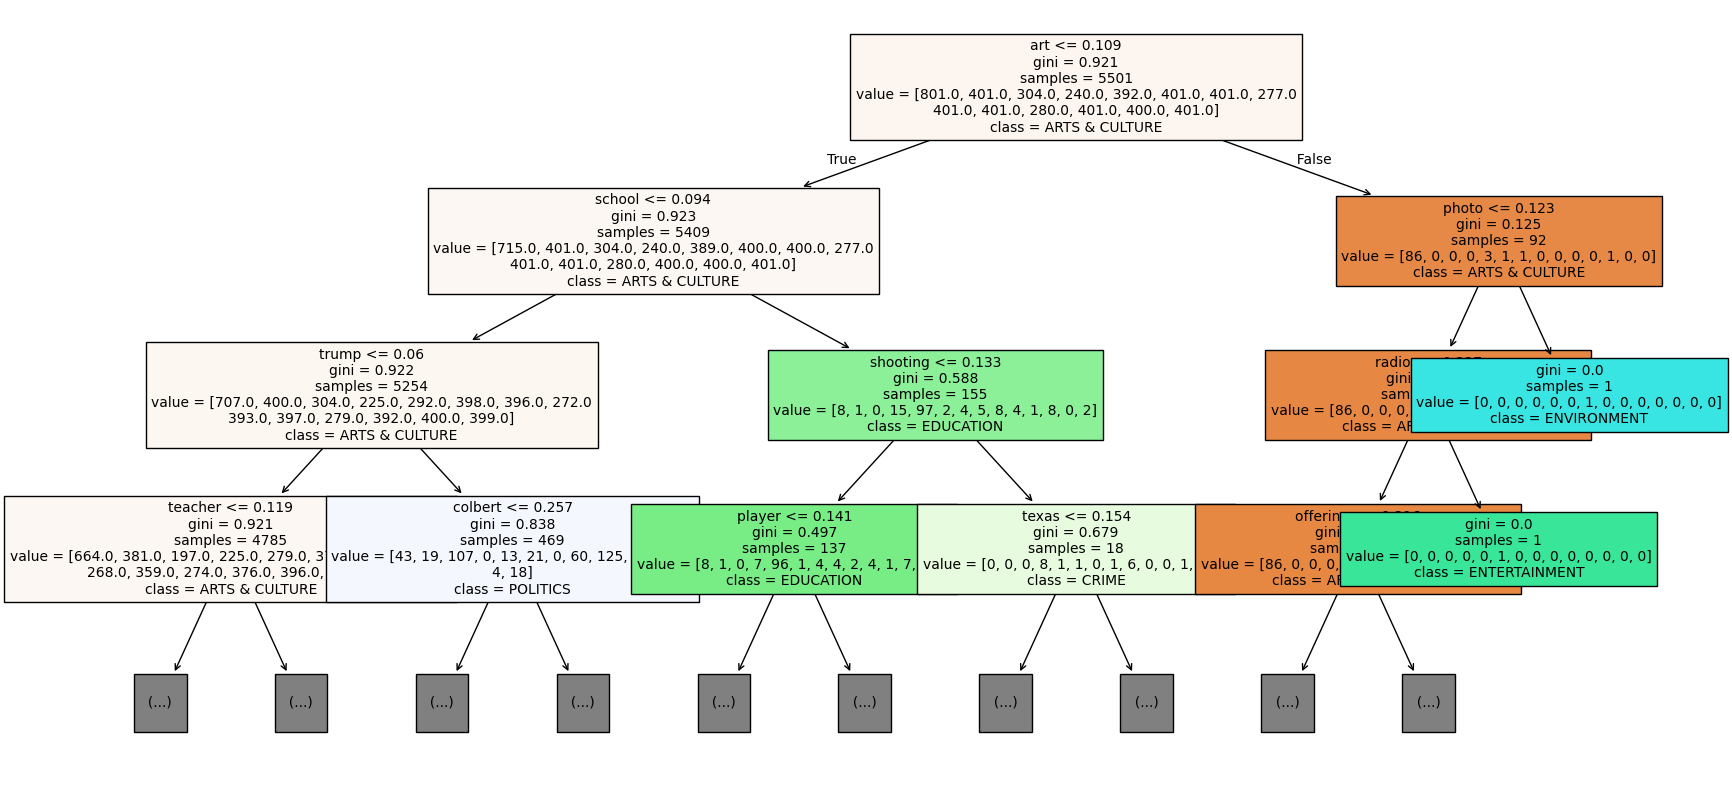

In [14]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Set the figure size for better readability
plt.figure(figsize=(20, 10))

# Plot the decision tree
plot_tree(dt_classifier, filled=True, feature_names=tfidf_vectorizer.get_feature_names_out(), class_names=categories, max_depth=3, fontsize=10)

# Show the plot
plt.show()




It's beautiful, but how well did it work?

Now we are coming to the complex and interesting world of model evaluation

Model Accuracy: 0.47


<Figure size 1000x800 with 0 Axes>

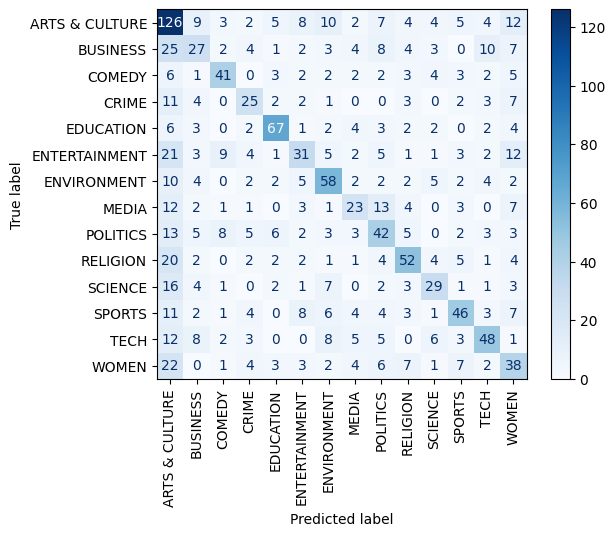

In [15]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Predict on the validation set
y_pred = dt_classifier.predict(X_val)

# Calculate accuracy
accuracy = accuracy_score(y_val, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

# Compute confusion matrix
conf_matrix = confusion_matrix(y_val, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=categories)
disp.plot(cmap=plt.cm.Blues, xticks_rotation='vertical')
plt.show()


In [16]:
#review the accuracy. How good is it?
#how do you think we are measuring accuracy? are we using the training or validation dataset? what will be the reason to use one over the other?
#review the confusion matrix.
#what is the most accurate category?

Neural Network

In [22]:
# Define the neural network model (Shallow)
model_1 = Sequential()

# Input layer with one hidden layer
model_1.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))

# Output layer
model_1.add(Dense(len(categories), activation='softmax'))

# Compile the model
model_1.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history_1 = model_1.fit(X_train.toarray(), y_train_encoded, epochs=10, batch_size=32, validation_data=(X_val.toarray(), y_val_encoded))

# Evaluate the accuracy
accuracy_1 = model_1.evaluate(X_val.toarray(), y_val_encoded, verbose=0)[1]
print(f"Model 1 (Shallow Network) Accuracy: {accuracy_1:.2f}")




Epoch 1/10
172/172 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.1261 - loss: 2.6023 - val_accuracy: 0.1621 - val_loss: 2.4000
Epoch 2/10
172/172 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.3086 - loss: 2.1751 - val_accuracy: 0.5305 - val_loss: 1.9328
Epoch 3/10
172/172 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.7722 - loss: 1.4598 - val_accuracy: 0.6134 - val_loss: 1.5356
Epoch 4/10
172/172 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.8725 - loss: 0.8908 - val_accuracy: 0.6344 - val_loss: 1.3412
Epoch 5/10
172/172 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9126 - loss: 0.5791 - val_accuracy: 0.6315 - val_loss: 1.2607
Epoch 6/10
172/172 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9555 - loss: 0.3752 - val_accuracy: 0.6279 - val_loss: 1.2337
Epoch 7/10
172/172 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9696 - loss: 0.2664 - val_accuracy: 0.6228 - val_loss: 1.2332
Epoch 8/10
172/172 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9806 - loss: 0.1953 - val_accuracy:

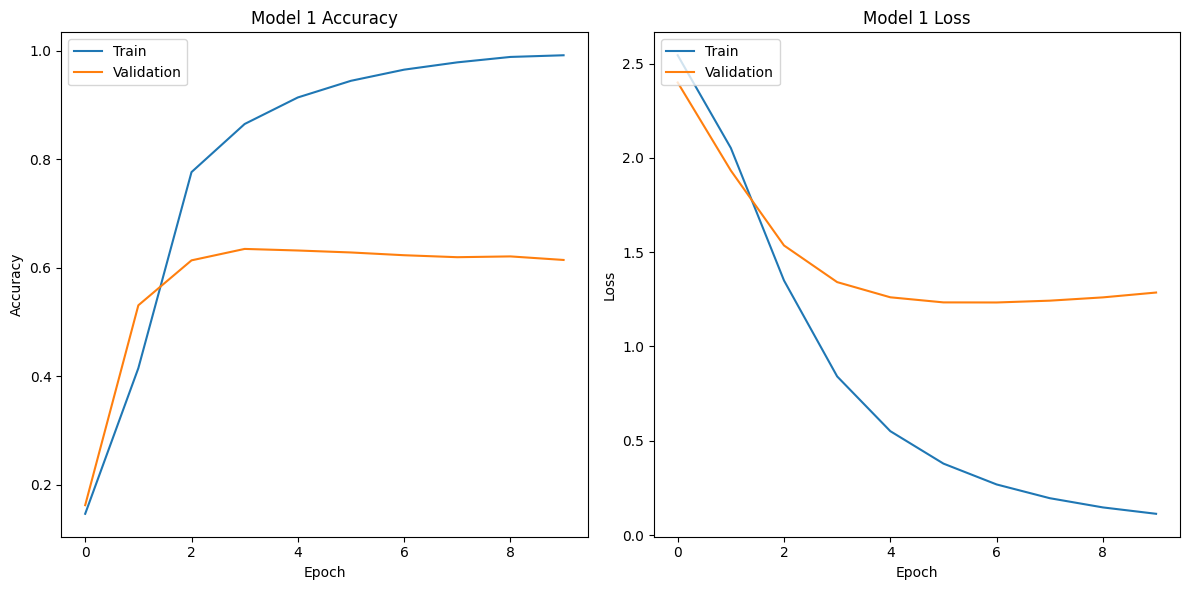

43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


<Figure size 1000x800 with 0 Axes>

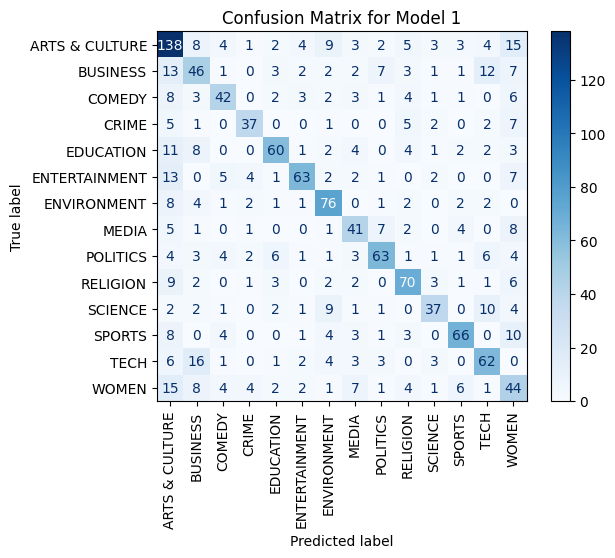

In [24]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history_1.history['accuracy'])
plt.plot(history_1.history['val_accuracy'])
plt.title('Model 1 Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history_1.history['loss'])
plt.plot(history_1.history['val_loss'])
plt.title('Model 1 Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

# Predict on the validation set
y_pred_prob_nn = model_1.predict(X_val.toarray())

# Convert predicted probabilities to class labels
y_pred_nn = np.argmax(y_pred_prob_nn, axis=1)

# Classification report
report = classification_report(y_val_encoded, y_pred_nn, target_names=categories)


# Compute confusion matrix
conf_matrix_nn = confusion_matrix(y_val_encoded, y_pred_nn)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
disp_nn = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_nn, display_labels=categories)
disp_nn.plot(cmap=plt.cm.Blues, xticks_rotation='vertical')
plt.title('Confusion Matrix for Model 1')
plt.show()



In [ ]:
'''
Which model is better?

Look at the training loss and validation loss. The lower the loss the better
the question is why is the training loss keeps declining, but we are not seeing improvements in validation loss?

This is a hard question, so try to answer, but it's ok to leave it blank if you are not sure

'''

We haven't discussed this below, but we will soon.

In short, the graphs below show training versus validation loss. The training loss represents the error on the data the model learns from, while the validation loss measures the error on new, unseen data. By plotting both losses over training epochs, we can see if the model is improving. If both losses decrease and stay close together, it means the model is learning effectively and generalizing well. However, if the training loss keeps decreasing but the validation loss starts increasing, it suggests overfitting, meaning that the model is memorizing the training data but not performing well on new data. Understanding these graphs helps us access the performance of the model and make architectual and training adjustments so that the model will improve its performance on real-world data.

In [26]:
#Challenge

#can you mess around with the models and improve their accuracy? what's your heighest score?

#feel free to use ChatGPT, but be able to explain the modifications using your own language


Possible Improvements:
- Experiment with different hyperparameters for both models.
- Try different text preprocessing techniques.
- Increase the number of features in TF-IDF vectorizer.
- Adjust the neural network architecture (layers, neurons, activation functions).
Modify the Neural Network model to improve accuracy.
- Add more hidden layers.
- Change the number of neurons in each layer.
- Try different activation functions (e.g., "tanh", "sigmoid").
- Increase the number of epochs.


Pick two of the first four bullets and two of the second set of four bullets above and perform. Paste your new code below and analyze the results. Please indicate what changes you are making.

Your Analysis Here